# Juntando R y Python

In [1]:
import numpy as np
import pandas as pd
#import rpy2 este no hace falta porque todo pasa por los dos siguientes !!!OJO!!! no olveidar el activar el conector
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri
import matplotlib.pyplot as plt

In [2]:
# Hay que hacer una llamada para que vaya creando las conversiones entre R y Python
rpy2.robjects.numpy2ri.activate()

In [3]:
codigo_r = """
saludar <- function(cadena) {
    return(paste("Hola, ",cadena))
}
"""

In [4]:
ro.r(codigo_r)

R object with classes: ('function',) mapped to:
<SignatureTranslatedFunction - Python:0x00000211BFE20AC8 / R:0x00000211C04BA6A8>

In [6]:
saludar_py = ro.globalenv["saludar"]

In [7]:
res =saludar_py("Antonio Banderas")
res[0]

'Hola,  Antonio Banderas'

In [8]:
print(saludar_py.r_repr())

function (cadena) 
{
    return(paste("Hola, ", cadena))
}


In [9]:
var_from_python = ro.FloatVector(np.arange(1,5,0.1))

In [11]:
var_from_python

1.000000,1.100000,1.200000,1.300000,...,4.600000,4.700000,4.800000,4.900000


In [12]:
print(var_from_python.r_repr())

c(1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.1, 2.2, 
2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3, 3.1, 3.2, 3.3, 3.4, 3.5, 
3.6, 3.7, 3.8, 3.9, 4, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 
4.9)


In [13]:
ro.globalenv["var_to_r"] = var_from_python

In [14]:
ro.r("var_to_r")

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9])

In [15]:
ro.r("sum(var_to_r)")

array([118.])

In [16]:
ro.r("mean(var_to_r)")

array([2.95])

In [17]:
ro.r("sd(var_to_r)")

array([1.16904519])

In [18]:
np.sum(var_from_python)

118.00000000000007

In [19]:
np.mean(var_from_python)

2.950000000000002

In [20]:
ro.r("summary(var_to_r)")

array([1.   , 1.975, 2.95 , 2.95 , 3.925, 4.9  ])

In [44]:
ro.r("hist(var_to_r)")

R object with classes: ('histogram',) mapped to:
<ListVector - Python:0x0000020BF8CD4A88 / R:0x0000020BF8B7C848>
[Float..., IntVe..., Float..., Float..., StrVe..., BoolV...]
  breaks: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000020BF7FA1408 / R:0x0000020BF9F18278>
[1.000000, 1.500000, 2.000000, 2.500000, ..., 3.500000, 4.000000, 4.500000, 5.000000]
  counts: <class 'rpy2.robjects.vectors.IntVector'>
  R object with classes: ('integer',) mapped to:
<IntVector - Python:0x0000020BF7FAF4C8 / R:0x0000020BF8B6FA98>
[6, 5, 5, 5, 5, 5, 5, 4]
  density: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000020BF88B03C8 / R:0x0000020BF8B7CD18>
[0.300000, 0.250000, 0.250000, 0.250000, 0.250000, 0.250000, 0.250000, 0.200000]
  mids: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x0000020BF898BDC8 / R:0x0000020BF8B7CA78>
[1.250000, 1.750000, 2.250000, 2.750000, 3.250000, 3.750000, 4.250000, 4.750000]
  xname: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x0000020BF898BB88 / R:0x0000020BF8B64690>
['var_to_r']
  equidist: <class 'rpy2.robjects.vectors.BoolVector'>
  R object with classes: ('logical',) mapped to:
<BoolVector - Python:0x0000020BF898BE88 / R:0x0000020BF8E03E10>
[       1]

## Trabajar de forma conjunta entre R y Python

In [21]:
from rpy2.robjects.packages import importr

In [25]:
ro.r("install.packages('extRemes')")
extremes = importr("extRemes") # Library (extRemes)

In [24]:
extremes

rpy2.robjects.packages.Package as a <module 'extRemes'>

In [26]:
fevd = extremes.fevd

In [28]:
#Consultar la documentación
print(fevd.__doc__)

Python representation of an R function.
description
-----------


 Fit a univariate extreme value distribution functions (e.g., GEV, GP, PP, Gumbel, or Exponential) to data; possibly with covariates in the parameters.
 


fevd(
    x,
    data,
    threshold = rinterface.NULL,
    threshold_fun = ~,
    location_fun = ~,
    scale_fun = ~,
    shape_fun = ~,
    use_phi = False,
    type = c,
    method = c,
    initial = rinterface.NULL,
    span,
    units = rinterface.NULL,
    time_units = days,
    period_basis = year,
    na_action = <rpy2.rinterface.ListSexpVector - Python:0x00000211C4CCE300 / R:0x00000211C4A19240>,
    optim_args = rinterface.NULL,
    priorFun = rinterface.NULL,
    priorParams = rinterface.NULL,
    proposalFun = rinterface.NULL,
    proposalParams = rinterface.NULL,
    iter = 9999.0,
    weights = 1.0,
    blocks = rinterface.NULL,
    verbose = False,
)

x :  `fevd`: `x` can be a numeric vector, the name of a column of `data` or a formula giving the data t

In [41]:
data = pd.read_csv("C:/Users/Megaport/Desktop/python/datos machine learning/time/time_series.txt",
                   sep="\s+", skiprows = 1, parse_dates=[[0,1]],
                  names = ["date","time","wind_speed"], index_col = 0)

In [42]:
data.head()

,wind_speed
date_time,
1983-01-01 00:00:00,7.9
1983-01-01 01:00:00,8.2
1983-01-01 02:00:00,8.5
1983-01-01 03:00:00,9.0
1983-01-01 04:00:00,9.9


In [43]:
data.shape

(275352, 1)

In [44]:
max_ws = data.wind_speed.groupby(pd.TimeGrouper(freq="A")).max()

C:\Users\Megaport\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


In [45]:
max_ws

date_time
1983-12-31    22.2
1984-12-31    25.5
1985-12-31    21.5
1986-12-31    22.5
1987-12-31    23.7
1988-12-31    22.5
1989-12-31    21.7
1990-12-31    29.7
1991-12-31    24.2
1992-12-31    23.8
1993-12-31    28.1
1994-12-31    23.4
1995-12-31    23.7
1996-12-31    25.6
1997-12-31    23.2
1998-12-31    24.9
1999-12-31    22.8
2000-12-31    24.6
2001-12-31    22.3
2002-12-31    25.5
2003-12-31    22.6
2004-12-31    24.0
2005-12-31    20.8
2006-12-31    23.5
2007-12-31    24.4
2008-12-31    24.1
2009-12-31    25.1
2010-12-31    19.4
2011-12-31    22.8
2012-12-31    24.2
2013-12-31    25.0
2014-12-31    25.3
Freq: A-DEC, Name: wind_speed, dtype: float64

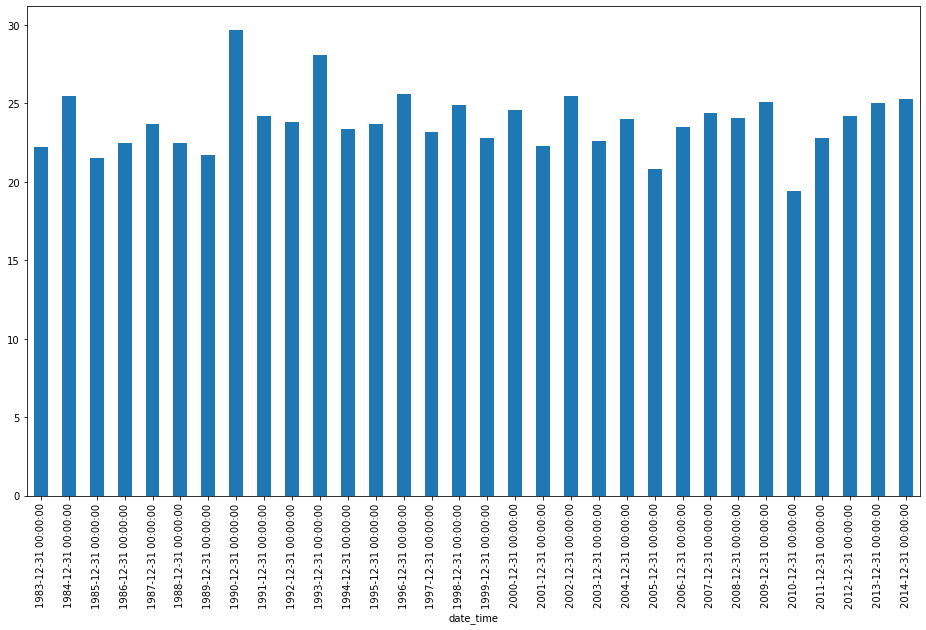

In [53]:
max_ws.plot(kind="bar", figsize=(16,9))

In [54]:
result = fevd(max_ws.values, type="GEV", method = "GMLE")

In [55]:
print(type(result))

<class 'rpy2.robjects.vectors.ListVector'>


In [56]:
result.r_repr

<bound method RObjectMixin.r_repr of R object with classes: ('fevd',) mapped to:
<ListVector - Python:0x00000211D09E7688 / R:0x00000211BE3125C8>
[Vector, StrVector, FloatVector, Array, ..., StrVector, StrVector, ListVector, ListVector]
  call: <class 'rpy2.robjects.vectors.Vector'>
  R object with classes: ('fevd',) mapped to:
<Vector - Python:0x00000211CE304508 / R:0x00000211C37668C0>
[SignatureT..., Array, StrVector, StrVector]
  data.name: <class 'rpy2.robjects.vectors.StrVector'>
  R object with classes: ('character',) mapped to:
<StrVector - Python:0x00000211C4CDCBC8 / R:0x00000211C3A51E48>
['struct..., '23.8, ..., '22.6, ..., '25.3),..., '']
  weights: <class 'rpy2.robjects.vectors.FloatVector'>
  R object with classes: ('numeric',) mapped to:
<FloatVector - Python:0x00000211C4CDC188 / R:0x00000211BC53D588>
[1.000000]
  missing.values: <class 'rpy2.robjects.vectors.Array'>
  R object with classes: ('array',) mapped to:
<Array - Python:0x00000211C4CDCB88 / R:0x00000211BCA3D5F8>
[ 

In [57]:
result.names

'call','data.name','weights','missing....,...,'na.action','parnames','results','initial....


In [58]:
print(result.names)

 [1] "call"            "data.name"       "weights"         "missing.values" 

 [5] "in.data"         "x"               "priorFun"        "priorParams"    

 [9] "method"          "type"            "period.basis"    "par.models"     

[13] "const.loc"       "const.scale"     "const.shape"     "n"              

[17] "na.action"       "parnames"        "results"         "initial.results"



In [63]:
res = result.rx("results")
print(res[0])

$par

  location      scale      shape 

23.0639415  1.7576913 -0.1628816 



$value

[1] 1e+16



$counts

function gradient 

       1        1 



$convergence

[1] 0



$message

NULL



$hessian

         location scale shape

location        0     0     0

scale           0     0     0

shape           0     0     0



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

[1] 1







In [62]:
print(res.r_repr)

<bound method RObjectMixin.r_repr of R object with classes: ('list',) mapped to:
<ListVector - Python:0x00000211CA9CD188 / R:0x00000211C35E3C88>
[ListVector]
R object with classes: ('list',) mapped to:
<ListVector - Python:0x00000211CA9CD188 / R:0x00000211C35E3C88>
[ListVector]>


In [64]:
loc, scale, shape = res[0].rx("par")[0]

In [65]:
loc

23.063941519915588

In [66]:
scale

1.7576912874286317

In [67]:
shape

-0.1628816367714792

# Función mágica para R

# Función con R, Python y RMagic

In [77]:
import rpy2.ipython

In [85]:
metodos = ["MLE", "GMLE","Bayesian","Lmoments"]
tipos = ["GEV", "Gumbel"]

In [86]:
for t in tipos:
    for m in metodos:
        print("Tipo de Ajuste: ", t)
        print("Métodos del Ajuste: ",m)
        result = fevd(max_ws.values, method = m, type = t)
        print(result.rx("results")[0])
        %R -i result plot.fevd(result)

Tipo de Ajuste:  GEV
Métodos del Ajuste:  MLE
$par

  location      scale      shape 

23.0517078  1.8085853 -0.1497984 



$value

[1] 66.22729



$counts

function gradient 

      28        6 



$convergence

[1] 0



$message

NULL



$hessian

           location      scale     shape

location  9.1825628 -0.3982934  11.22038

scale    -0.3982934 21.4422632  19.81854

shape    11.2203805 19.8185358 172.17411



$num.pars

$num.pars$location

[1] 1



$num.pars$scale

[1] 1



$num.pars$shape

[1] 1







UsageError: Line magic function `%R` not found.
